# Tutorial 5: Python toolkit: Introduction to Pandas

_BS1819 Data Structures and Algorithms, September 2018_

_Imperial College Business School_


---
In the previous tutorial, we worked with the `numpy` library, which is the standard library for numeric manipulations in Python.

In this tutorial, we will move to `pandas`, a library that builds on top of numpy with higher level structures to allow convenient and versatile data analysis. Today we will cover the use of pandas  `pandas` for loading data, representing it using pandas structures (series and dataframes), and manipulating/accessing data with pandas. In the next tutorial, we will continue to work on data aggregation and merging in pandas.

---


## Recap

### Question 0: Recap

**A.** Create a Python list containing 100 consecutive multiples of 2, starting from 4, ie 4,6,8, and so on. What is the last element of the list?

**B.** What is the sum of the list value?

In [26]:
# Solve the recap exercise here and assign the correct values in 
# the next cell.
L = []
for ind in range(100):
    ...


Use the command 
```
python ok -q recap -u
```
on the command line to test your results.

## Submitting your work

There are eight questions in total, some on the command line, some in the Notebook. You will get full credit for making a good attempt at most of the questions.

After you're done with the exercises below, you'll submit the assignment to OK directly from this Notebook. The submission instructions are in the end of the tutorial.

First, let's connect the Notebook to OK. To do so, run the code cell below. It may prompt you to log in. If it does, follow the instructions.

In [ ]:
# Don't change this cell; just run it. 
# The result will give you directions on how to log in to the OK submission system.
# Once you're logged in, OK should remember it for the duration of the session.
import zipimport
import os
nb_path = os.path.join('client', 'api', 'notebook')
ok_bundle =  zipimport.zipimporter('./ok').load_module('client')
ok_nb = zipimport.zipimporter('./ok').load_module(nb_path)
ok = ok_nb.Notebook('tut05.ok')
_ = ok.auth(inline=True)

The below cell provides an alternative way to log in to OK if the above way fails on your laptop for some reason. If the login worked, you can skip to the recap exercise.

In [ ]:
# If your login works with the above cell, no need to run this
# If the above cell does not work, this is a backup way of loading up OK
# Don't change this cell; just run it. 
!pip install -U okpy
from client.api.notebook import Notebook
ok = Notebook('tut05.ok')
_ = ok.auth(inline=True)

If the OK problem still persists, try the following steps: 
1. Go to the command line and navigate to the folder where you have this Notebook.
2. Run the command `python ok` and log in the standard way
3. Try running the first cell above again.
The questions ask you to use Python. You can do so below. 

## Pandas

Pandas builds on top of numpy and matplotlib to provide data analysis and statistical functionalities in Python. 

We will first introduce some core aspects of pandas using toy data, and then analyse a real data set. 

In [1]:
# # We import the numpy library to generate some random data.
# # Also the pandas library is imported.
import numpy as np
import pandas as pd

# # We fix the seed so that the results are reproducible.
# # Please do not change the seed below.
np.random.seed(seed=9)
# # Let's generate some toy data (sampled from a Gaussian distribution)
values = np.random.randn(100, 1)

Much of the work we do with pandas revolves around the use of _DataFrames_ to organize data. A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet. If you've used R, chances are you've already used dataframes. The functionalities are very similar. The data structures in pandas build on and wrap around most popular data-types of python, e.g. lists, numpy arrays, so it's easy to move from one to another and call functions that work on a specific structure. 

In [2]:
# # Let's use the numpy vector that we created above to create a DataFrame.
dataframe = pd.DataFrame(data=values)


In [3]:
# # Pandas also includes most of the core methods/properties of a numpy array.
# # For instance, you can call get the shape the same way as in a numpy array.
print(dataframe.shape)

# # Few additional methods that are exactly the same (in the way you call them)
# # as in the numpy arrays are the max, min, median, mean, sum, std (standard 
# # deviation) methods.
print(dataframe.max())
# # The max value should be ~2.45. 

# # To get only the max value without the additional information, you 
# # could do: 
print(dataframe.max()[0])

(100, 1)
0    2.455183
dtype: float64


### Question 1: Dataframe summary

** A. ** What is the min value of the dataframe?

** B. ** What is the mean value of the dataframe?

** C. ** Now create a new DataFrame named `dataframe_10k` that includes a vector of 10000 elements sampled from a Gaussian as above. What is the mean value now? ** Hint ** Remember to copy the same seed as above to ensure that you create the same array as in the test. The random.seed and the creation of the matrix should be in the same cell.

In [ ]:
# Change the next line so that min_elem_df contains the min
# element of dataframe. 
# The expected result is ONLY the min value.
min_elem_df = ...

# Change the next line so that mean_elem_df contains the mean
# element of dataframe. 
# The expected result is ONLY the mean value.
mean_elem_df = ...

In [7]:
# Please do not modify the line below (allows us to replicate the results).
np.random.seed(seed=9)

# The lines below concern part C of Question 1. 
# Modify the line below so that it creates the dataframe of 10k elements
# as mentioned in the description (part C above).
dataframe_10k = ...

# Change the next line so that mean_10k contains the mean
# element of dataframe_10k. 
mean_10k = ...

In [ ]:
# Test cell; please do not change!
_ = ok.grade('q1')

Now that we've seen how a DataFrame is initiated and some methods that it includes, you might wonder the benefits over using a numpy array. 

Here are some important differences between the two:

* A numpy array demands homogeneous data, while in a dataframe, different data types (float, string, datetime) are allowed in the same structure.
* Numpy is an amazing low-level tool, required by most other libraries (including pandas). However, pandas offers a  plethora of high-level functionality, e.g. grouping data by conditions (groupby) and combining datasets with merge and join methods.
* The data (columns/rows) can have labels in pandas. In numpy the programmer needs to have in mind the semantics of each column/row, while in dataframe they are explicitly coded in the structure.

Let's study an example that utilises some of those. We'll create a small dataset of a few countries with the countries names, population, GDP, a d country codes. This sounds like a problem where we might use dictionary. Indeed the dictionary is convenient for housing this kind of data. However, data/number processing with a dictionary can be cumbersome.

In [116]:
d1 = {}
d1['countries'] = ['UK', 'France', 'Spain', 'Netherlands']
d1['codes'] = ['uk', 'fr', 'es', 'nl']
# # the population is measured in millions
d1['population'] = [65.6, 66.9, 46.6, 17.0]
# # the gdp is measured in billions
d1['gdp'] = [2619, 2465, 1232, 770]

In [117]:
# # Let's create a dataframe now with that data.
# # DataFrame includes a convenience constructor that
# # just accepts the dictionary data and creates
# # the same structure as in the previous example.
countries_data = pd.DataFrame(d1)

print(countries_data['gdp'])
countries_data # Notebook gives a nice HTML table of the dataframe

0    2619
1    2465
2    1232
3     770
Name: gdp, dtype: int64


,codes,countries,gdp,population
0,uk,UK,2619,65.6
1,fr,France,2465,66.9
2,es,Spain,1232,46.6
3,nl,Netherlands,770,17.0


In [118]:
# # Additionally, we can call the aggregation methods as above, but now we get
# # a result per column (which makes sense, we do not want to average
# # gdps together with populations).
countries_data.mean()

gdp           1771.500
population      49.025
dtype: float64

### Question 2: More summaries

** A. ** What is the sum of the populations in the `countries_data`?

** B. ** What is the standard deviation of the gdp's in the `countries_data`?

In [131]:
# Change the next line so that sum_pop_countries_data computes the sum of
# the populations from countries_data.
# (by default the answer is expected to have one decimal)
sum_pop_countries_data = ...

# Change the next line so that std_gdp_countries_data computes the std of
# the gdp from countries_data.
# (by default the answer is expected to have one decimal)
std_gdp_countries_data = ...

In [ ]:
# Test cell; please do not change!
_ = ok.grade('q2')

## File loading, data processing with Pandas

Now that you've become familiar with Dataframe, let's scale up our exploration and download a real dataset. We will use the Titanic dataset from the Kaggle Getting Started challenge at:

https://www.kaggle.com/c/titanic-gettingStarted

The dataset is included with the tutorial as `titanic.csv`.

In [43]:
%matplotlib inline 
# make sure matplotlib plots display nicely in the Notebook

In [76]:
# # Let's load the first csv file. 
data = pd.read_csv('titanic.csv')

# # Printing the shape of the dataset we have just loaded.
print(data.shape)

# # The first step in data analysis is the exploration step.
# # We want to verify that a) our dataset is appropriately loaded,
# # b) get a sense of what values it has.
# # Let's display the 5 first rows:
data.head(5)
# # (When we run this in the Notebook, we will get a nice 
# #  HTML representation of the table.)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's extract some info from what we have just printed:

As you've noticed, each row has an id, while the columns have names that help us categorise the values of the columns. For instance, the fourth row includes the names of the passengers, while the sixth their age. 
In the first passenger, in his cabing info, we notice the 'NaN' value, which tupically declares a missing value in pandas.

Pandas includes a lot of built-in tools and methods that produce useful insights for our data. For instance:

In [77]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FC8CE4048>]], dtype=object)

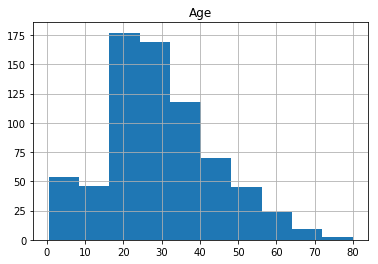

In [78]:
# # Pandas also allow us to plot values directly. 
# # Let's plot a histogram of the age of the passengers
# # pandas wraps around the relevant matplotlib function to directly do plotting. 
# # We could also import matplotlib as before
data.hist(column='Age')

For accessing a specific value of a column you can you use the at[] property or the get() method, like this:

```python
>>> data.at[0, 'Age']
22
>>> data.get('Age')
# the entire column
```

### Question 3: Accessing a dataframe

** A. ** What is the age of the 10th passenger (i.e. PassengerId is 10)?

** B. ** What is the cabin value for the 194th passenger?

In [132]:
# Change the next line so that age_passenger_10 computes the age of
# the 10th passenger.
age_passenger_10 = ...

# Change the next line so that cabin_194_passenger computes the 
# cabin number of the 194th passenger.
cabin_194_passenger = ...

In [ ]:
# Test cell; please do not change!
_ = ok.grade('q3')

### Question 4: More accessing

Fill in the line of code below and then test it using the cell below.

In [133]:
# Change the next line so that it computes ticket number/id of
# the 100th passenger
ticket_i_th_passenger = ...

# We've put this line in this cell so that it will print
# the value you've given to ticket_i_th_passenger when you
# run it.  You don't need to change this.
ticket_i_th_passenger

Ellipsis

In [ ]:
# Test cell; please do not change!
_ = ok.grade('q4')

#### Data modification with pandas

In addition to parsing data, pandas can be used to modify data tables. We will go through a few common methods.

In [82]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
# # Let's delete the first and the third 
# # passengers (remember the indexing in 
# # python starts from 0).
data.drop([0, 2], axis=0).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [84]:
# # Apart from that, you can also delete whole columns or rows.
# # For instance, for your problem, the Cabin column might be 
# # irrelevant, let's delete it.
data.drop(['Cabin'], axis=1).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Let's now print the first five elements to check how the dataset looks like.

In [85]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Take a minute to consider what pandas have printed for you...

You might have observed, that the 'Cabin' column that we deleted above (the result showed it was deleted above) is still there. You will also notice, that even the elements that we deleted (passengers 1 and 3) are also re-added. Or were they never deleted in the first place? 

By default in pandas `drop` is not "inplace": in other words, the function returns you a *copy* while the original is untouched. However, since the copy is of the same type, you can assign it to a new variable, which will now contain only the reduced elements/columns.

In [86]:
# # Let's check that the data type is the same.
print(type(data))
# # What about the return type from a drop operation?
print(type(data.drop(['Cabin'], axis=1)))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### Question 5

Assign to the variable `reduced_data` the pandas matrix that does not include the columns of Cabin, Embarked and SibSp. Then execute the cell below for testing with the ok system.

In [ ]:
# Change the next line so that it computes the reduced data matrix.
reduced_data = ...

# We've put this line in this cell so that it will print
# the value you've given to reduced_data when you
# run it.  You don't need to change this.
reduced_data.head()

In [121]:
# Test cell; please do not change!
_ = ok.grade('q5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



Apart from deleting, you can also replace values by new ones. Remember that the main purpose of pandas is statistical computation, hence we often translate values to numbers that we know how to process. 

For instance, strings, such as 'male' or 'female' are not really useful for statistical analysis. We usually prefere to replace them with numerical values:

In [89]:
data.replace('male', 1).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


As with drop, the replace function returns a copy, so keep in mind that if you want to save them, you have to assign to a new variable.

In [90]:
# # An alternative way to replace the data is the following:
data['Sex'] = data['Sex'].map({'female': 1, 'male': 0})

In [91]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Let's now assume that from an external source, you figure out the Nationality of the passengers and want to insert that information. Pandas allow you to insert new rows, and in contrast with the aforementioned methods, this is an in-place operation. 

In [92]:
# # Right after the Sex, we want to include a new field named 'Nationality'. 
# # Since most of the passengers are Irish, we will by default assign 
# # the label 'Irish' to them and refine for those that are not.
data.insert(5, 'Nationality', 'Irish')

data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Nationality,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,Irish,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Irish,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,Irish,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Irish,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,Irish,35.0,0,0,373450,8.0500,NaN,S


So far, we have replaced the values of a complete column, however what if we want to perform some modifications in specific values per row (e.g. if a condition is true)?

In [93]:
# # Let's assume for a moment that the nationality of 
# # those with Age NaN is Other European (hence why there 
# # are no records of their age).
# # We want to replace the default nationality with
# # their known nationality.
import numpy as np
for index, row in data.iterrows():
    if np.isnan(data.loc[index, "Age"]):
        data.loc[index, "Nationality"] = "European"

In [94]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Nationality,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,Irish,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Irish,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,Irish,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Irish,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,Irish,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,European,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,Irish,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,Irish,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,Irish,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,Irish,14.0,1,0,237736,30.0708,NaN,C


In [95]:
# # What we've done above is to replace some of the nationalities with 'European'. 
# # One property of pandas that we've utilised for that is the '.loc'.
# # Let's explore that a bit more: 
print(data.loc[3])

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                       1
Nationality                                           Irish
Age                                                      35
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                                                  S
Name: 3, dtype: object


As can be easily verified from the print above, this provides the whole row of the 4th passenger (as Python follows zero-based indexing). In other words, data.loc is a way to index a row or even a specific 'cell' inside the row as we did above with `data.loc[index, "Nationality"]'.

In [96]:
# # As typically done in higher level libraries in python, '.loc' offers a great deal of functionality. 
# # You can find furthr information by executing data.loc??
help(data.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Purely label-location based indexer for selection by label.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'`` (note that contrary
 |    to usual python slices, **both** the start and the stop are included!).
 |  - A boolean array.
 |  - A ``callable`` function with one argument (the calling Series, DataFrame
 |    or Panel) and that returns valid output for indexing (one of the above)
 |  
 |  ``.loc`` will raise a ``KeyError`` when the items are not found.
 |  
 |  See more at :ref:`Selection by Label <indexing.label>`
 |  
 |  Method 

We can filter dataframes directly:

In [110]:
european_bool = data['Nationality'] == 'European' # creates Booleans for each entry
print(european_bool.head(10))
# We could then pick only these records with 
europeans = data[european_bool]
# If we want to count different values, we can do 
data['Nationality'].value_counts()
# Counting how many non null values exist would be data['Nationality'].count()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: Nationality, dtype: bool


Irish       714
European    177
Name: Nationality, dtype: int64

## Review questions

In this tutorial, we've been introduced to the pandas library for data analysis. Based on your newly acquired knowledge, how would you answer the following?

* Why is pandas library useful when there is numpy? 
* Can you manipulate the pandas tables? Or are they read-only?

Pandas is the workhorse of the Python analytics community. In the next tutorial, we will build on today's material with pandas's powerful data aggregation methods, and do a brief introduction to machine learning with the `scikit-learn` library.

______________________________________________________________________________________________

**Important**. Before you leave lab, run this final cell to submit your work.

In [ ]:
_ = ok.submit()

## Optional exercises

### Question 6

** A. ** Can you replace the nationality with numbers? For instance, you can assign the Irish = 0, Other European = 1. 

** B. ** How many people of European nationality are there? (Following the assumption above for the NaN in the age)

** C. ** For how many passengers do we have with Cabin information?


In [135]:
# Change the next line so that it computes the number of
# people with European nationality.
n_european = ...

# Change the next line so that it computes the number of
# people for which we have cabin information.
n_passengers_cabin = ...

In [ ]:
# Test cell; please do not change!
_ = ok.grade('q6')

### Question 7

Assign to the variable `only_pclass2` the pandas matrix that includes only the passengers with Pclass = 2. Then execute the cell below for testing with the ok system.

In [ ]:
# Change the next line so that it computes a new dataframe
# that includes only the people with Pclass = 2.
# One way to use conditions in pandas is directly with data[CONDITION]
only_pclass2 = ...

# We've put this line in this cell so that it will print
# the value you've given to only_pclass2 when you
# run it.  You don't need to change this.
only_pclass2.head()

In [ ]:
# Test cell; please do not change!
_ = ok.grade('q7')